# 7 Matplotlibを使ったデータ可視化

この章では、2章で基礎を学んだMatplotlibについて、さらに深く学びます。2章では折れ線グラフやヒストグラムを扱いましたが、ここでは棒グラフや円グラフ、バブルチャートの作成方法について学びます。

そして、この章の最後に今までの総合問題として、時系列データの分析とマーケティングの分析の問題を用意しています。これまで学んだ手法を試せる機会ですので、ぜひチャレンジしてみてください。

ゴール：Matplotlibを使って、さまざまなデータを可視化することができる。この章の総合問題が解ける。

- **[7.1 データの可視化](#7.1-データの可視化)**
    - [7.1.1 データの可視化について](#7.1.1-データの可視化について)
    - [7.1.2 この章で使うライブラリのインポート](#7.1.2-この章で使うライブラリのインポート)
<br><br>
- **[7.2 データ可視化の基礎](#7.2-データ可視化の基礎)**
    - [7.2.1 棒グラフ](#7.2.1-棒グラフ)
    - [7.2.2 円グラフ](#7.2.2-円グラフ)
<br><br>
- **[7.3 応用：金融データの可視化](#7.3-応用：金融データの可視化)**
    - [7.3.1 可視化する金融データ](#7.3.1-可視化する金融データ)
    - [7.3.2 ローソクチャートを表示するモジュール](#7.3.2-ローソクチャートを表示するモジュール)
<br><br>
- **[7.4 応用：分析結果の見せ方を考えよう](#7.4-応用：分析結果の見せ方を考えよう)**
    - [7.4.1 資料作成のポイントについて](#7.4.1-資料作成のポイントについて)
<br><br>
- **[7.5 総合問題](#7.5-総合問題)**
    - [7.5.1 ■総合問題7-1 時系列データ分析](#■総合問題7-1-時系列データ分析)
    - [7.5.2 ■総合問題7-2 マーケティング分析](#■総合問題7-2-マーケティング分析)

***

## 7.1 データの可視化


### 7.1.1 データの可視化について
2章の冒頭でも触れた通り、データを可視化することで、さまざまな示唆を得ることができます。単に数字をみているだけでは得られない発見もありますし、図にすることで、データに対する理解がより深まります。また、データ分析の結果を相手に説明する場合も、可視化は重要です。さまざまな数値を比較してそれらの数値だけ見せるよりは、それらを棒グラフや円グラフにして見せるほうが、相手にとっても理解がしやすいはずです。ここでは、データの可視化をするための手法や見せ方のポイントを紹介します。


### 7.1.2 この章で使うライブラリのインポート

この章では、2章で紹介した各種ライブラリを使います。次のようにインポートしていることを前提として、以下、進めていきます。

In [0]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

# 小数第３位まで表示
%precision 3

'%.3f'

## 7.2 データ可視化の基礎
キーワード：棒グラフ、円グラフ、バブルチャート、積み上げグラフ

ここでは、データを可視化するMatplotlibについてもう少し詳しく学んでいきましょう。これまで折れ線グラフ、ヒストグラムなどのグラフを使ってきました。ここでは、棒グラフや円グラフ、積み上げグラフなどについても紹介していきます。

### 7.2.1 棒グラフ

まずは、棒グラフからです。これは、カテゴリーごと（地域別、部門別など）に数値を比較したいときに使います。棒グラフを表示するには、pyplotモジュールの`bar`関数を使います。棒にラベルを表示したいときは、`xtick`関数を使って以下のように指定します。

また、そのまま実行するとグラフが左に寄ってあまり見栄えが良くないので、グラフを中央に寄せるために、`align = 'center'`パラメータを指定するとよいでしょう。$x$のラベルや$y$のラベルの付け方は、2章で説明した通りです。

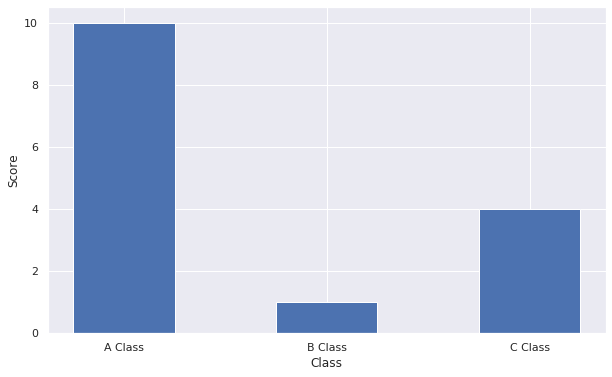

In [0]:
# 表示するデータ
x = [1, 2, 3]
y = [10, 1, 4]

# グラフの大きさ指定  
plt.figure(figsize = (10, 6))

plt.bar(x, y, align='center', width = 0.5)

# 棒グラフそれぞれのラベル
plt.xticks(x, ['A Class', 'B Class', 'C Class'])

# xとyのラベルを設定
plt.xlabel('Class')
plt.ylabel('Score')

# グリッドを表示
plt.grid(True)

#### 横の棒グラフ
先ほどは縦の棒グラフでしたが、横にしたい場合は、`barh`関数を使います。なお、$x$の軸と$y$の軸が入れかわるので、ラベルを再設定しています。

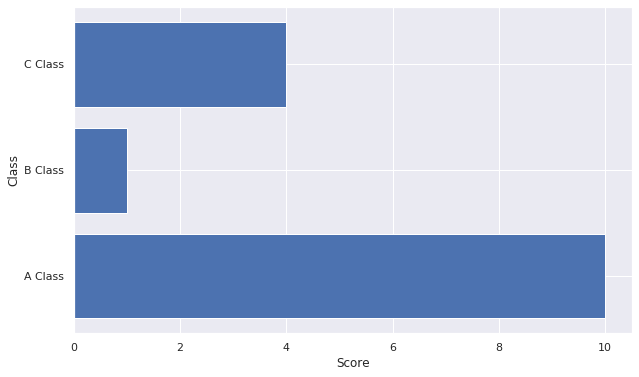

In [0]:
# 表示するデータ
x = [1, 2, 3]
y = [10, 1, 4]

# グラフの大きさ指定 
plt.figure(figsize = (10, 6))

plt.barh(x, y, align = 'center')
plt.yticks(x, ['A Class','B Class','C Class'])
plt.ylabel('Class')
plt.xlabel('Score')
plt.grid(True)

#### 複数のグラフを描く

次に複数の棒グラフを描き、それぞれ比較してみましょう。以下は、クラスごとに数学の一期目の成績と最終成績をそれぞれグラフ化し、比較できるようにしたものです。

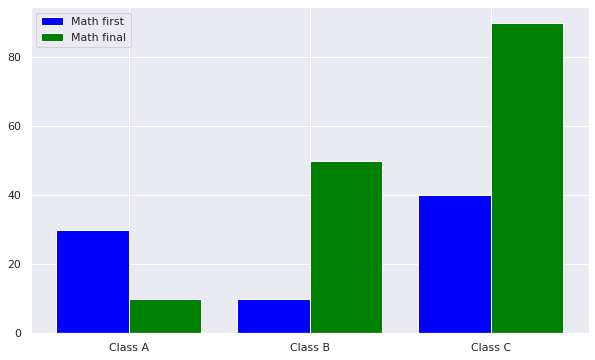

In [0]:
# データの準備
y1 = np.array([30, 10, 40])
y2 = np.array([10, 50, 90])

# X軸のデータ
x = np.arange(len(y1))

# グラフの幅
w = 0.4

# グラフの大きさ指定
plt.figure(figsize = (10, 6))

# グラフの描画。y2の方はグラフの幅の分、右にずらして描画する 
plt.bar(x, y1, color = 'blue', width = w, label = 'Math first', align = 'center')
plt.bar(x + w, y2, color='green', width = w, label = 'Math final', align = 'center')

# 凡例を最適な位置に配置
plt.legend(loc = 'best')

plt.xticks(x + w / 2, ['Class A', 'Class B', 'Class C'])
plt.grid(True)

#### 積み上げ棒グラフ

次に示すのは、積み上げの棒グラフの例です。同じく`bar`関数を使っていますが、`bottom`パラメータの設定に注目してください。上に積む方のグラフで、`bar`のパラメータとしてbottom=＜下に積むグラフ＞を指定します。

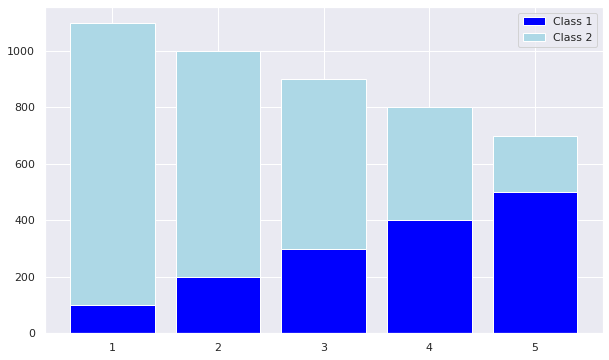

In [0]:
# データの準備
height1 = np.array([100, 200, 300, 400, 500])
height2 = np.array([1000, 800, 600, 400, 200])

# X軸
x = np.array([1, 2, 3, 4, 5]) 

# グラフの大きさ指定 
plt.figure(figsize = (10, 6))

# グラフの描画
p1 = plt.bar(x, height1, color = 'blue')
p2 = plt.bar(x, height2, bottom = height1, color='lightblue')

# 凡例を表示 
plt.legend((p1[0], p2[0]), ('Class 1', 'Class 2'))

なお、すでに説明していますが、関数のパラメータ等は、`help`関数を使うと調べられます。

In [0]:
help(plt.legend)

### 7.2.2 円グラフ
次に、円グラフの描き方を説明します。これは、全体的な割合が各々どれくらいあるのか見るときに使います。

#### 一般的な円グラフ
円グラフを描くには`pie`関数を使って、それぞれのサイズやラベル等を設定します。`axis`関数で円グラフを丸く表示するように調整します。`autopct`パラメータでそれぞれの割合を表示する書式を指定します。また`explode`パラメータを指定すると、特定のカテゴリーだけ、円グラフの全体から離す調整ができます（ここでは、`Hogs`だけ0.1に設定しています）。

`startangle`パラメータは、各要素の出力を開始する角度を表します。このパラメータを指定することで、出力開始位置を変更できます。「90」と指定すると上部中央が開始位置になり、反時計回りの方向に変更したい場合は正の値、時計回りに変更したい場合は負の値を指定します。

出力する向きは`counterclock`パラメータで指定します。`True`または指定しない場合は時計回りに、`False`と指定すると反時計回りに出力されます。


(-1.214, 1.135, -1.126, 1.101)

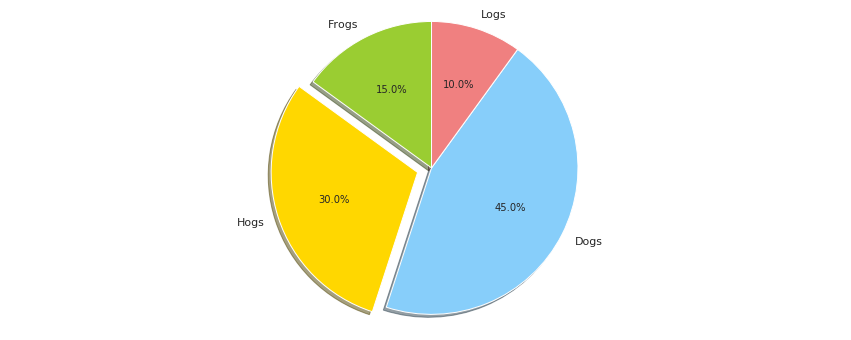

In [0]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0) 

# グラフの大きさ指定
plt.figure(figsize = (15, 6))

# グラフを表示
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)

# 円を丸く描画
plt.axis('equal')

`pie`関数のパラメータも、次のように`help`関数で確認できます。

In [0]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : array-like
        The wedge sizes.
    
    explode : array-like, optional, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list,

#### バブルチャート
次に`scatter`関数を使って、バブルチャートを作成してみます。

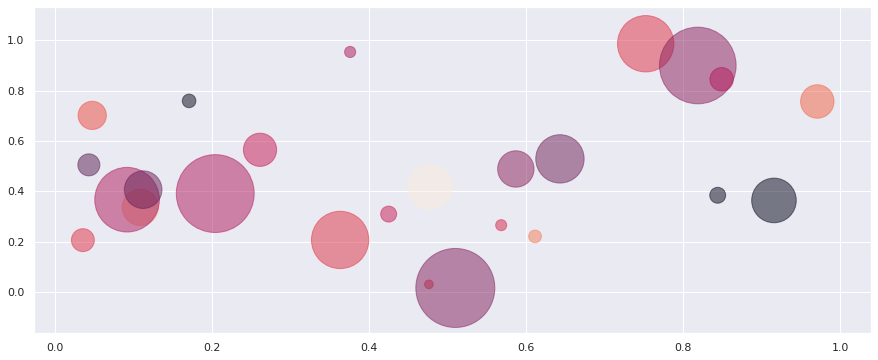

In [0]:
N = 25

# X,Yデータをランダムに生成 
x = np.random.rand(N)
y = np.random.rand(N)

# color番号
colors = np.random.rand(N)

# バブルの大きさをばらけさせる 
area = 10 * np.pi * (15 * np.random.rand(N)) ** 2

# グラフの大きさ指定
plt.figure(figsize = (15, 6))

# グラフを描画
plt.scatter(x, y, s = area, c = colors, alpha = 0.5)
plt.grid(True)

`scatter`関数のパラメータも`help`を使って確認しましょう。

In [0]:
help(plt.scatter)

なお、Pandasにも可視化機能が備わっており、`plot`メソッドでグラフ化できます。たとえばデータの後に「`.plot(kind='bar')`」と記すと、縦の棒グラフが描けます。「`kind='barh'`」にすれば横の棒グラフ、「`kind='pie'`」にすれば円グラフとなります。必要なときに使ってください。
また本節の練習問題以外にも、以前扱ったデータを使って、色々とグラフ化できるので、実際にどのようなグラフができるか、作成してみましょう。

>**[やってみよう]**
>
>以下の練習問題以外にもデータを色々とグラフ化してみましょう。どのような目的を持って、どんなグラフを作成しますか?

これまでデータの可視化についてPythonの機能を紹介・実行してきました。しかし、データ分析やデータの可視化が注目されている現在、さまざまなデータ可視化ツール（Tableau 、Excel、PowerBIなど）があるため、ビジネスの現場ではそれらを使う場面が多くなっており、Pythonや他のプログラミング言語で可視化する機会は減っていきそうな雰囲気はあります。

しかし可視化レポートの自動化、アプリケーションとの連携、可視化の細かい設定などはプログラミングをした方が柔軟に対応できるケースもあります。そういった用途でデータの可視化を行うときはぜひ活用してください。

#### <練習問題 7-1>

3章で使った、数学の成績を示すデータである「student-mat.csv」を使って、学校を選んだ理由（`reason`）を円グラフ化して、それぞれの割合を出してください。

In [11]:
math_data = pd.read_csv( '/content/drive/My Drive/DataScience/ds_samplefiles/student-mat.csv', sep=';' )
math_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


reason
course        145
home          109
other          36
reputation    105
dtype: int64


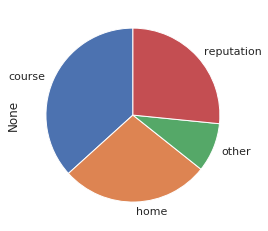

In [12]:
a = math_data.groupby('reason').size()
print( a )
a.plot(kind='pie', startangle=90)
# # グラフを表示
# plt.pie(math_data)

# # 円を丸く描画
# plt.axis('equal')

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### <練習問題 7-2>

<練習問題 7-2>と同じデータで、`higher` (高い教育を受けたいかどうか。値は`yes`か`no`）を軸にして、それぞれの数学の最終成績G3の平均値を棒グラフで表示してください。ここから何か推測できることはありますか？

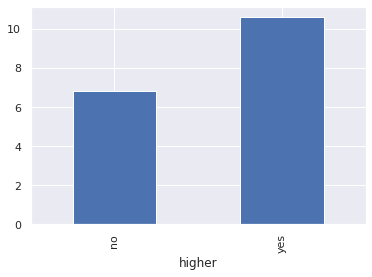

In [13]:
math_data.groupby('higher')['G3'].mean().plot(kind='bar')

#### <練習問題 7-3>

上記と同じデータで、通学時間（`traveltime`）を軸にして、それぞれの数学の最終成績G3の平均値を横棒グラフで表示してください。何か推測できることはありますか？

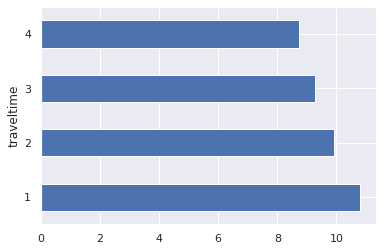

In [0]:
math_data.groupby('traveltime')['G3'].mean().plot(kind='barh', label='first')

In [18]:
data = math_data.groupby('traveltime')["G3"].mean()
data

traveltime
1    10.782101
2     9.906542
3     9.260870
4     8.750000
Name: G3, dtype: float64

## 7.3 応用：金融データの可視化
キーワード：ローソクチャート

ここでは、金融データの可視化について扱っていきます。ただし、応用範囲ですので、スキップしても問題ありません。練習問題もありません。

### 7.3.1 可視化する金融データ

この節では、次に示す金融データの可視化を考えます。

In [0]:
# 日付データの設定。freq='T'で1分ごとにデータを生成する
idx = pd.date_range('2015/01/01', '2015/12/31 23:59', freq='T')

# 乱数の発生。１か−１を発生させる
dn = np.random.randint(2, size = len(idx)) * 2 - 1

# ランダムウォーク（ランダムに数値が増減するデータ）を作成
# np.cumprodは累積積を算出している（1番目の要素 * 2番目の要素 * 3番目の要素 * … と和が累積されていく）
rnd_walk = np.cumprod(np.exp(dn * 0.0002)) * 100

# resample('B')でデータを営業日単位でリサンプリング。
# ohlcメソッドで「open」「high」「low」「close」の4つのデータにする。
df = pd.Series(rnd_walk, index=idx).resample('B').ohlc()

そのままプロットすると、以下のようになります。なお、ここではPandasの可視化機能を使っています。数値はランダムに生成しているので、実際には紙面とは異なる形のグラフになります。

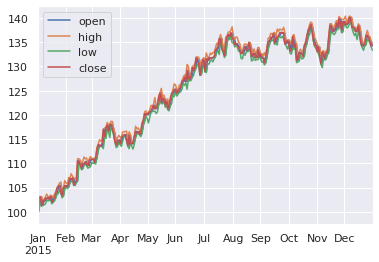

In [22]:
df.plot(grid = True)

### 7.3.2 ローソクチャートを表示するライブラリ

このグラフをローソクチャートとして表示してみましょう。
そのためには、Plotlyライブラリが必要です。Jupyter Notebookのセルに「!pip install plotly」と入力して［Run］を実行し、インストールしておいてださい。


ローソクチャートの表示に関しては、参考URL「B-23」も参考にしてください。


In [23]:
!pip install plotly 

Plotlyライブラリのローソクチャート作成の機能を使えば、以下のように綺麗に表示することができます。インタラクティブにグラフをズームインすることもできますし、カーソルを載せると数字が表示され便利です。

In [25]:
# plotly モジュールのインポート
from plotly.offline import init_notebook_mode, iplot
from plotly import figure_factory as FF

# Jupyter notebook用設定
init_notebook_mode(connected=True) 

# ローソクチャートの設定
fig = FF.create_candlestick(df.open, df.high, df.low, df.close, dates = df.index)
iplot(fig)

参考文献「A-16」もご覧ください。PythonではなくJavaScriptのものもありますが、データを可視化するのに参考となります。『PythonユーザのためのJupyter［実践］入門』はJupyter Notebookの使い方について詳しく記載があり、データの可視化についてのコンテンツが充実しています。

## 7.4 応用：分析結果の見せ方を考えよう
ゴール：基本的な資料作成の方法を知る、データ分析結果を伝えるためのポイントを知る

これまでは、データ分析に必要なプログラミング技法を中心に、データ処理やそのテクニックについて学んできました。データの可視化についても、データを棒グラフにしたり、折れ線グラフにする方法、ラベルのつけ方など、テクニカルな解説が中心でした。自分自身の理解のために、探索的にデータをチェックするだけであれば、特に体裁は気にせず、デフォルトでグラフ表示される結果を見るだけでよいかもしれません。しかし、データ分析の結果を第三者に伝えるためには、その見せ方を工夫する必要があります。説明的分析ともいいますが、そのデータ分析結果を他人に伝える方法や、その資料作成の方法について、基本的なポイントを以下に記載します。

### 7.4.1 資料作成のポイントについて
キーワード：特になし

データの分析結果の報告は、今の会社にいる上層部への報告、クライアントへの提案など、さまざまな場面があります。資料作成の方法には、以下で紹介する参考文献などたくさんありますが、次に示す点は、共通して大切です。

- 何のためにデータ分析をして、何を見せたいのかはっきりさせる

- そもそもその分析結果を誰に伝えるのか？　を考える

- いきなり資料の作成を開始しない、PowerPointを開かない、その前に考える

- その結果を見せることで、どんな具体的なアクションを促したいか？

- それをやることでどれだけ儲かるか？　コストが下がるのか？

- 何を話すのか、目次（アジェンダ）をはっきりさせる（全体像を見せる） 

- 基本的に結論が先

- 情報を入れすぎない、無駄なものは削除

- 言いたいことを一言で＋下にその根拠となるデータ（表）の可視化

- ストーリーを考える

その他、第三者に説明するときに3Dのグラフはあまり使わないほうが良いなどのポイントなどもありますが、それも場面によるので、やはりその結果を誰に見せるのか考えることが大事です。

また、先ほども書いたように、データを可視化するのは、Excelや他のツール（Tableauなど）でも良いです。この書籍ではPythonを採用しているのでMatplotlibを使ってグラフ等を表示していますが、ビジネスの現場で無理してMatplotlibを使う必要はありません。データがそれほど大きくない場合、素早くデータを可視化するのにExcelは非常に優れています。ケースバイケースで判断して、ツールを選んでください。

短いですが、以上が資料作成の基本となる作法になります。本書では、これ以上詳しくは扱いません。
以下は参考となる本で、資料を作成する際に読んでみてください。なお、本書は資料作成を主テーマとした本ではないので、テクニカルな技術を身につけるという視点でこのまま解説をしていきます。

参考文献「A-17」も参考にしてください。

以上でデータ可視化の章は終了です。お疲れ様でした。

次の問題は、金融の時系列データとマーケティングの購買データに関する総合問題です。今まで学んだテクニックが活かせる問題です。一部、これまで扱わなかった処理方法もあるので、ヒントなど参考にして、調べながら取り組んでください。
初学者にはなかなかハードな問題かもしれませんが、これらの問題に取り組むことで、今まで学んだ技法が役に立つことを実感できるでしょう。

***

## 7.5 総合問題

### ■総合問題7-1 時系列データ分析

ここでは、本章で身に付けたPandasやScipyなどを使って、時系列データついて扱っていきましょう。

（1）（データの取得と確認）下記のサイトより、dow_jones_index.zipをダウンロードし、含まれている`dow_jones_index.data`を使って、データを読み込み、はじめの5行を表示してください。またデータのそれぞれのカラム情報等を見て、`NaN`などがあるか確認してください。　　

https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip　　

（2）（データの加工）カラムの`open`、`high`、`low`、`close`等のデータは数字の前に$マークが付いているため、これを取り除いてください。また、日時を`date`型で読み込んでいない場合は、date型に変換しましょう。

（3）カラムの`close`について、各`stock`ごとの要約統計量を算出してください。

（4）カラムの`close`について、各`stock`の相関を算出する相関行列を出してください。また、`Seaborn`の`heatmap`関数を使って、相関行列のヒートマップを描いてみましょう（ヒント：`Pandas`の`corr`メソッドを使います）。

（5）(4)で算出した相関行列の中で一番相関係数が高い`stock`の組み合わせを抽出してください。さらに、その中でもっとも相関係数が高いペアを抜き出し、それぞれの時系列グラフを描いてください。

（6） Pandasの`rolling`メソッド（窓関数）を使って、上記で使った各`stock`ごとに、`close`の過去5期（5週間）移動平均時系列データを計算してください。

（7） Pandasの`shift`メソッドを使って、上記で使った各stockごとに、`close`の前期（1週前）との比の対数時系列データを計算してください。さらに、この中で、一番ボラティリティ（標準偏差）が一番大きい`stock`と小さい`stock`を抜き出し、その対数変化率グラフを書いてください。

>**[ポイント]**
>
>(6)、(7)の補足についての補足です。
>
>時系列データ$(\cdots ,y_{t-1},y_t,y_{t+1}, \cdots )$の過去n期の移動平均データとは、過去5期のデータの平均、つまり以下を意味します。

\begin{eqnarray}
ma_t = \sum_{s=t-n+1}^t \frac{y_s}{n}
\end{eqnarray}

>時系列データ$(\cdots ,y_{t-1},y_t,y_{t+1}, \cdots )$の前期（1週前）との比の対数時系列データとは、$\log \frac{y_t} {y_{t-1}}$から成るデータのことです。増減率$r_t = \frac{y_t - y_{t-1}}{y_t}$が小さいとき、$r_t \approx \log \frac{y_t} {y_{t-1}}$の関係が成り立ちます。これは、$x$が十分小さいときに成り立つ、$\log (1+x) \approx x$から導かれます。増減率データ$(r_1,\cdots ,r_N )$のボラティリティとは、標準偏差

\begin{eqnarray}
\sqrt{\frac{1}{N}\sum_{t=1}^N (r_t - \frac{1}{N}\sum_{t=1}^N r_t)^2}
\end{eqnarray}

>のことで、価格変動の大きさを示す指標として利用されます。

In [0]:
!unzip "/content/drive/My Drive/DataScience/ds_samplefiles/dow_jones_index.zip" -d "/content/drive/My Drive/DataScience/ds_samplefiles/dow_jones_index"

Archive:  /content/drive/My Drive/DataScience/ds_samplefiles/dow_jones_index.zip
  inflating: /content/drive/My Drive/DataScience/ds_samplefiles/dow_jones_index/dow_jones_index.data  
  inflating: /content/drive/My Drive/DataScience/ds_samplefiles/dow_jones_index/dow_jones_index.names  


In [0]:
data = pd.read_csv( "/content/drive/My Drive/DataScience/ds_samplefiles/dow_jones_index/dow_jones_index.data" )
data.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [0]:
func_delete_dollar =  lambda x: str(x).replace('$', '')
data.open = data.open.map( func_delete_dollar )
data.high = data.high.map( func_delete_dollar )
data.low = data.low.map( func_delete_dollar )
data.close = data.close.map( func_delete_dollar )
data.next_weeks_open = data.next_weeks_open.map( func_delete_dollar )
data.next_weeks_close = data.next_weeks_close.map( func_delete_dollar )
data

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,80.22,82.63,80.07,82.63,68230855,3.00424,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,83.28,83.75,80.18,81.18,78616295,-2.52161,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,80.93,81.87,79.72,79.78,92380844,-1.42098,17.508519,78616295.0,80.00,79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,80.00,80.82,78.33,79.02,100521400,-1.22500,8.811952,92380844.0,78.65,76.78,-2.377620,54,0.594786


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
quarter                               750 non-null int64
stock                                 750 non-null object
date                                  750 non-null object
open                                  750 non-null object
high                                  750 non-null object
low                                   750 non-null object
close                                 750 non-null float64
volume                                750 non-null int64
percent_change_price                  750 non-null float64
percent_change_volume_over_last_wk    720 non-null float64
previous_weeks_volume                 720 non-null float64
next_weeks_open                       750 non-null object
next_weeks_close                      750 non-null object
percent_change_next_weeks_price       750 non-null float64
days_to_next_dividend                 750 non-null int64
percent_return_next_div

In [0]:
data.close = pd.to_numeric( data.close )

In [0]:
data.close.describe()

count    750.000000
mean      53.729267
std       32.788787
min       10.520000
25%       30.365000
50%       45.930000
75%       72.667500
max      170.580000
Name: close, dtype: float64

### ■総合問題7-2 マーケティング分析

次は、マーケティング分析でよく扱われる購買データです。一般ユーザーとは異なる法人の購買データですが、分析する軸は基本的に同じです。

（1）下記のURLよりデータをpandasで読み込んでください（件数50万以上のデータで比較的大きいため、少し時間がかかります）。

http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

>**[ヒント]**
>
>`pd.ExcelFile`を使って、シートを`.parse('Online Retail')`で指定してください。

また、今回の分析対象は、`CustomerID`にデータが入っているレコードのみ対象にするため、そのための処理をしてください。さらに、カラムの`InvoiceNo`には数字の前に`C`があるものはキャンセルのため、このデータを取り除いてください。他にもデータとして取り除く必要なものがあれば、適宜処理してください。以下、このデータをベースに分析していきます。

（2）このデータのカラムには、購買日時や商品名、数量、回数、購買者の`ID`などがあります。ここで、購買者（`CustomerID`）のユニーク数、バスケット数（`InvoiceNo`のユニーク数）、商品の種類（`StockCode`ベースと`Description`ベースのユニーク数）を求めてください。

（3）このデータのカラムには、`Country`があります。このカラムを軸に、それぞれの国の購買合計金額（単位あたりの金額×数量の合計）を求め、降順にならべて、上位5つの国の結果を表示してください。

（4）（3）の上位5つの国について、それぞれの国の商品売り上げ（合計金額）の月別の時系列推移をグラフにしてください。ここで、グラフは分けて表示してください。

（5）（3）の上位5つの国について、それぞれの国における商品の売り上げトップ5の商品を抽出してください。また、それらを国ごとに円グラフにしてください。なお、商品は「`Description`」ベースで集計してください。